# Loading the Dataset

In [7]:
#Data Preprocessing
#Reading the CSV file

import pandas as pd
data = pd.read_csv('/home/vishal/Documents/UC_Interview/data_assignment.gz')

# Performing Exploratory Data Analysis

In [46]:
# Display the first few rows of the dataset
print(data.head())

# Summary of the dataset
print(data.info())

#basic statistics of given dataset
print(data.describe)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())
data.fillna(data.mean())

   is_exclusive_lead bookingslot  ns_count_1day  ns_count_3day  \
0                  0   AfterNoon              0              0   
1                  0   AfterNoon              0              0   
2                  0   AfterNoon              0              0   
3                  0   AfterNoon              0              0   
4                  0   AfterNoon              0              0   

   ns_count_1week  ns_count_1month  ns_count_6month  responded_lead_1day  \
0               0                1                5                    2   
1               0                1                4                    2   
2               1                1                1                    3   
3               0                1               19                    2   
4               0                0                1                    2   

   responded_lead_3day  responded_lead_1week  ...  days_no_block_in_6month  \
0                    6                    13  ...                   

/tmp/ipykernel_16449/1431457578.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean())


,is_exclusive_lead,bookingslot,ns_count_1day,ns_count_3day,ns_count_1week,ns_count_1month,ns_count_6month,responded_lead_1day,responded_lead_3day,responded_lead_1week,...,days_no_block_in_6month,days_block_in_6month,number_times_blocked_in_6month,avg_order_value_1day,avg_order_value_3day,avg_order_value_1week,avg_order_value_1month,avg_order_value_3month,avg_order_value_6month,ns
0,0,AfterNoon,0,0,0,1,5,2,6,13,...,178,2,1,0.0,157.833333,352.923077,479.406250,399.288660,363.672646,0
1,0,AfterNoon,0,0,0,1,4,2,7,15,...,180,0,0,372.0,302.857143,382.400000,421.212121,384.906832,347.167742,0
2,0,AfterNoon,0,0,1,1,1,3,5,10,...,180,0,0,249.0,149.400000,411.800000,339.971429,273.268041,225.731132,0
3,0,AfterNoon,0,0,0,1,19,2,7,22,...,179,0,0,0.0,406.285714,255.181818,342.552632,422.446512,386.900000,0
4,0,AfterNoon,0,0,0,0,1,2,7,20,...,180,0,0,114.5,162.428571,183.400000,186.033708,162.231034,169.665428,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181854,1,AfterNoon,0,0,0,0,5,2,6,10,...,163,17,6,0.0,0.000000,219.800000,369.258064,306.210526,284.182825,0
181855,0,Morning,0,0,0,1,4,3,7,12,...,159,21,2,479.0,337.857143,249.416667,482.482143,689.587879,649.046154,0
181856,1,Morning,0,0,0,1,4,5,14,33,...,147,11,4,452.8,222.000000,133.090909,127.733333,123.558912,132.714961,0
181857,0,AfterNoon,0,0,0,1,4,6,19,37,...,160,0,0,0.0,127.157895,164.891892,291.937888,286.413194,323.235294,0


In [49]:
# Exploring distribution of 'ns' column
print(data['ns'].value_counts())

0    176250
1      5609
Name: ns, dtype: int64


In [50]:
print(data['bookingslot'])

0         AfterNoon
1         AfterNoon
2         AfterNoon
3         AfterNoon
4         AfterNoon
            ...    
181854    AfterNoon
181855      Morning
181856      Morning
181857    AfterNoon
181858      Evening
Name: bookingslot, Length: 181859, dtype: object


In [51]:
# Analyze the distribution of categorical variables
categorical_features = ['bookingslot']  # Add other categorical features if applicable
for feature in categorical_features:
    print(data[feature].value_counts())

AfterNoon    99820
Evening      54373
Morning      26138
Night         1528
Name: bookingslot, dtype: int64


# Data Visualization:
Now, let's visualize the distribution of features and explore relationships with the target variable:

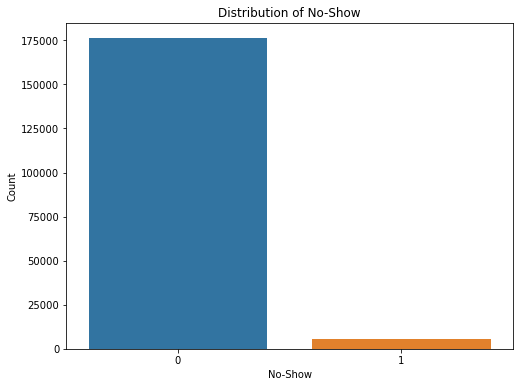

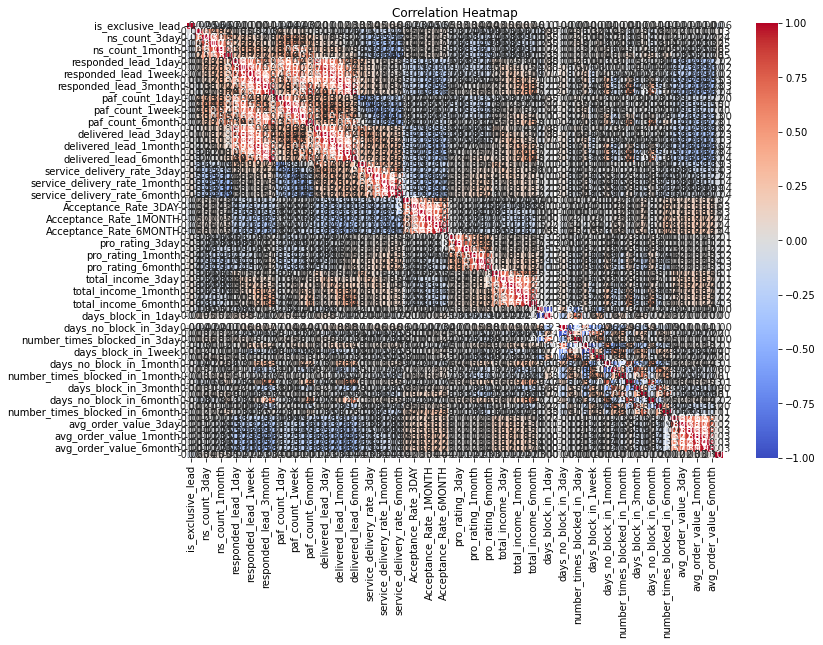

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable (No-Show)
plt.figure(figsize=(8, 6))
sns.countplot(x='ns', data=data)
plt.title('Distribution of No-Show')
plt.xlabel('No-Show')
plt.ylabel('Count')
plt.show()

# Explore relationships between features and target variable
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Exploring additional insights

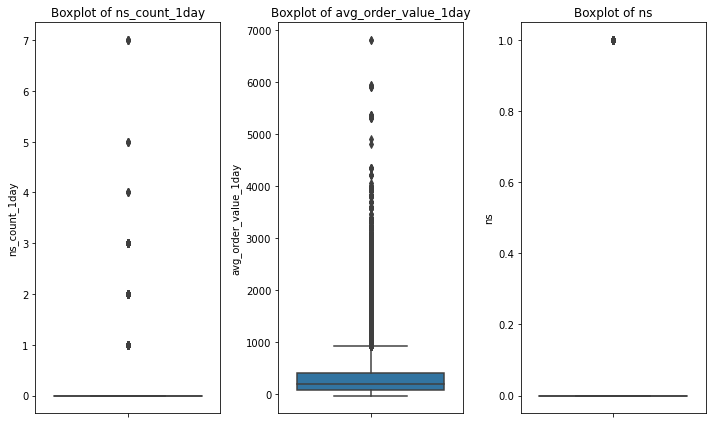

In [53]:

# For example, checking for outliers in numerical features

# Selecting numerical features for outlier detection
numerical_features = ['ns_count_1day', 'avg_order_value_1day','ns']

# Create boxplots for numerical features
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Feature Engineering

In [65]:

#encoding categorical variables
data_encoded = pd.get_dummies(data, columns=['bookingslot'], drop_first=True)
print('data_encoded',data_encoded)

#rounding up the float values
data_rounded = data_encoded.round(2)
print('data2',data_rounded)

import numpy as np
# Replace infinity values with a large number
data_rounded.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)
print(data_rounded)

nan_check = data_rounded.isna().any()
print("NaN check:")
print(nan_check)

# Check for missing values (NaN or None)
missing_check = data_rounded.isnull().any()
print("\nMissing value check:")
print(missing_check)

# Check for infinite values
inf_check = np.isinf(data_rounded).any()
print("\nInfinite value check:")
print(inf_check)


data_encoded         is_exclusive_lead  ns_count_1day  ns_count_3day  ns_count_1week  \
0                       0              0              0               0   
1                       0              0              0               0   
2                       0              0              0               1   
3                       0              0              0               0   
4                       0              0              0               0   
...                   ...            ...            ...             ...   
181854                  1              0              0               0   
181855                  0              0              0               0   
181856                  1              0              0               0   
181857                  0              0              0               0   
181858                  1              0              1               1   

        ns_count_1month  ns_count_6month  responded_lead_1day  \
0                    

In [98]:
#converting float to integers
data_new = data_rounded.astype(int)

/home/vishal/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


# Predictive Modeling


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into train and test sets
X = data_new.drop('ns', axis=1)
y = data_new['ns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build RandomForestClassifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9579896623776532
Confusion Matrix:
 [[34809   399]
 [ 1129    35]]


Plotting Results

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35208
           1       0.08      0.03      0.04      1164

    accuracy                           0.96     36372
   macro avg       0.52      0.51      0.51     36372
weighted avg       0.94      0.96      0.95     36372



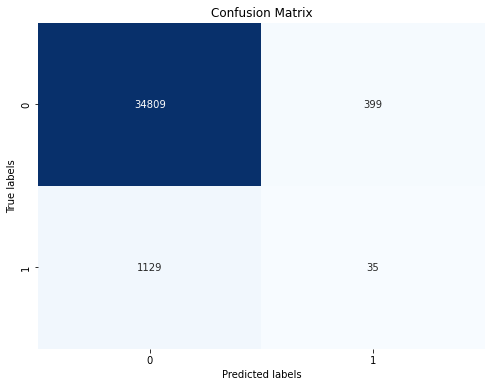

In [101]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


Feature Importances

Top 5 Most Important Features:
Feature: bookingslot_Evening, Importance: 0.1466916122496466
Feature: bookingslot_Morning, Importance: 0.08359729081872709
Feature: is_exclusive_lead, Importance: 0.06485971126153602
Feature: total_income_1day, Importance: 0.02334310389774809
Feature: avg_order_value_1week, Importance: 0.023327905137168408


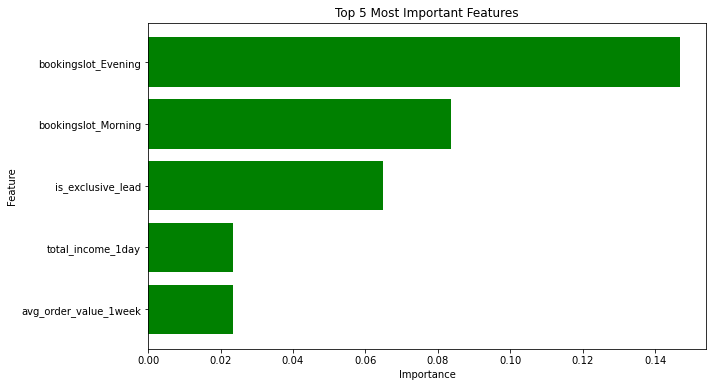

In [109]:
# Access feature importances
feature_importances = rf_model.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Number of top features to display
top_n = 5

# Print the top N most important features
print(f"Top {top_n} Most Important Features:")
for feature, importance in sorted_feature_importances[:top_n]:
    print(f"Feature: {feature}, Importance: {importance}")
    

features = [feature[0] for feature in sorted_feature_importances[:top_n]]
importances = [feature[1] for feature in sorted_feature_importances[:top_n]]
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

# Ideal threshold for prediction

In [106]:
# Determining ideal threshold for our prediction
# First we have to calculate the predicted probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Now we have to calculate expected benefit for different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
benefits = []

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    true_positives = ((y_pred == 1) & (y_test == 1)).sum()
    false_positives = ((y_pred == 1) & (y_test == 0)).sum()
    true_negatives = ((y_pred == 0) & (y_test == 0)).sum()
    false_negatives = ((y_pred == 0) & (y_test == 1)).sum()
    
    benefit = true_positives * 400 + true_negatives * 0 + false_positives * (-200) + false_negatives * (-150)
    benefits.append(benefit)
    print(benefit)

# Finally,calculating threshold with maximum benefit
optimal_threshold = thresholds[benefits.index(max(benefits))]
print("Optimal Threshold:", optimal_threshold)

-585900
-441500
-353750
-293800
-235550
-214750
-185350
-176400
-175000
Optimal Threshold: 0.9


# Associated SQL Query for EDA

In [ ]:
CREATE DATABASE my_database;

#Creating a table
CREATE TABLE my_table (
    is_exclusive_lead INT,
    ns_count_1day INT,
    ns_count_3day INT,
    ns_count_1week INT,
    ns_count_1month INT,
    ns_count_6month INT,
    responded_lead_1day INT,
    responded_lead_3day INT,
    responded_lead_1week INT,
    responded_lead_1month INT,
    --
    --
    --
    avg_order_value_1day FLOAT,
    avg_order_value_3day FLOAT,
    avg_order_value_1week FLOAT,
    avg_order_value_1month FLOAT,
    avg_order_value_3month FLOAT,
    avg_order_value_6month FLOAT,
    ns INT,
    bookingslot_Evening INT,
    bookingslot_Morning INT,
    bookingslot_Night INT
);

#Load data from CSV file into table
LOAD DATA INFILE '/home/vishal/Documents/UC_Interview/data_assignment.gz'
INTO TABLE my_table
FIELDS TERMINATED BY ','
ENCLOSED BY '"'
LINES TERMINATED BY '\n'
#IGNORE 1 ROWS; -- We can skip header row if it exists

#Verify Data: Once the data is loaded, we can verify by querying the table and displaying some rows.
SELECT *
FROM my_table
LIMIT 10;

-- Get column names and data types
SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = 'my_table';

-- Get summary statistics for numerical columns
SELECT 
    COUNT(*) AS total_rows,
    MIN(ns_count_1day) AS min_ns_count_1day,
    MAX(ns_count_1day) AS max_ns_count_1day,
    AVG(ns_count_1day) AS avg_ns_count_1day,
    -- Add similar calculations for other numerical columns
FROM my_table;

#Let's explore the distribution of the target variable ('ns')
SELECT ns, COUNT(*) AS count
FROM my_table
GROUP BY ns;


#Check distribution of numerical features
SELECT 
    AVG(ns_count_1day) AS avg_ns_count_1day,
    STDDEV(ns_count_1day) AS stddev_ns_count_1day,
    -- We can do for similar calculations for other numerical columns as well
FROM my_table;

#Check for outliers using quartiles
SELECT 
    PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY ns_count_1day) AS q1_ns_count_1day,
    PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY ns_count_1day) AS q3_ns_count_1day,
FROM my_table;


-- Correlation between numerical features and 'ns'
SELECT 
    CORR(ns_count_1day, ns) AS corr_ns_count_1day,
FROM my_table;
